In [1]:
import os
import pandas as pd
import requests
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

In [2]:
load_dotenv()

True

In [3]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [5]:
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [6]:
start_date = pd.Timestamp("2019-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

In [10]:
tickers = ["SPY", "LUV", "DIS", "AAPL", "SBUX", "WORK"]
from alpaca_trade_api.rest import REST, TimeFrame

In [12]:
yearly = alpaca.get_bars(
    tickers,
    TimeFrame.Day,
    start = start_date,
    end = end_date,
    limit=1000
).df
yearly
                             

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2019-05-01 04:00:00+00:00,210.20,215.3100,209.2300,210.52,64827505,441450,212.670859,AAPL
2019-05-02 04:00:00+00:00,209.65,212.6500,208.1300,209.15,32000324,233410,210.155469,AAPL
2019-05-03 04:00:00+00:00,210.78,211.8400,210.2300,211.75,21092378,148449,211.161771,AAPL
2019-05-06 04:00:00+00:00,204.16,208.8400,203.5000,208.48,32444375,236173,207.309513,AAPL
2019-05-07 04:00:00+00:00,205.86,207.4175,200.8250,202.86,38763698,294532,203.568951,AAPL
...,...,...,...,...,...,...,...,...
2020-04-02 04:00:00+00:00,65.38,68.7000,62.9100,65.00,18175040,174965,64.980401,SBUX
2020-04-03 04:00:00+00:00,64.47,64.7500,60.9000,63.05,14676460,136804,62.791096,SBUX
2020-04-06 04:00:00+00:00,66.04,68.3400,64.4100,67.79,18011829,158385,66.305617,SBUX


In [13]:
yearly.index = yearly.index.date
yearly = yearly[["close", "symbol"]]

In [14]:
tables = pd.pivot_table(yearly, values="close", index=yearly.index, columns=["symbol"])
tables

symbol,AAPL,DIS,LUV,SBUX
2019-05-01,210.52,136.38,53.90,77.52
2019-05-02,209.15,134.14,53.37,77.47
2019-05-03,211.75,134.33,53.62,78.05
2019-05-06,208.48,135.00,53.48,78.06
2019-05-07,202.86,133.44,52.21,77.96
...,...,...,...,...
2020-04-27,283.17,106.06,29.11,NaN
2020-04-28,278.58,106.21,29.69,NaN
2020-04-29,287.73,112.25,30.97,NaN
2020-04-30,293.80,108.15,31.25,NaN


In [15]:
daily_returns = tables.pct_change().dropna()
daily_returns

symbol,AAPL,DIS,LUV,SBUX
2019-05-02,-0.006508,-0.016425,-0.009833,-0.000645
2019-05-03,0.012431,0.001416,0.004684,0.007487
2019-05-06,-0.015443,0.004988,-0.002611,0.000128
2019-05-07,-0.026957,-0.011556,-0.023747,-0.001281
2019-05-08,0.000197,0.011616,0.003831,0.001154
...,...,...,...,...
2020-04-27,0.000707,0.048127,-0.007501,0.000000
2020-04-28,-0.016209,0.001414,0.019924,0.000000
2020-04-29,0.032845,0.056868,0.043112,0.000000
2020-04-30,0.021096,-0.036526,0.009041,0.000000


<AxesSubplot:ylabel='Frequency'>

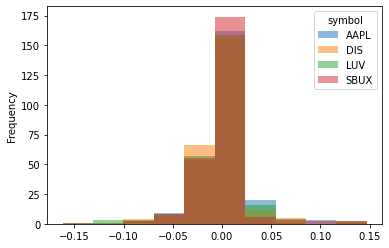

In [16]:
daily_returns.plot.hist(alpha=0.5)